In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('penguins_size.csv')
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.shape

(344, 7)

## Univariate Analysis

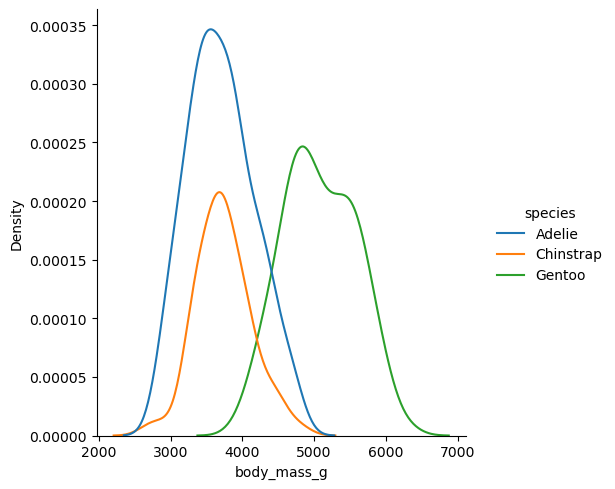

In [6]:
#Distribution of body mass for each species
sns.displot(data=data, x="body_mass_g", hue="species", kind="kde")

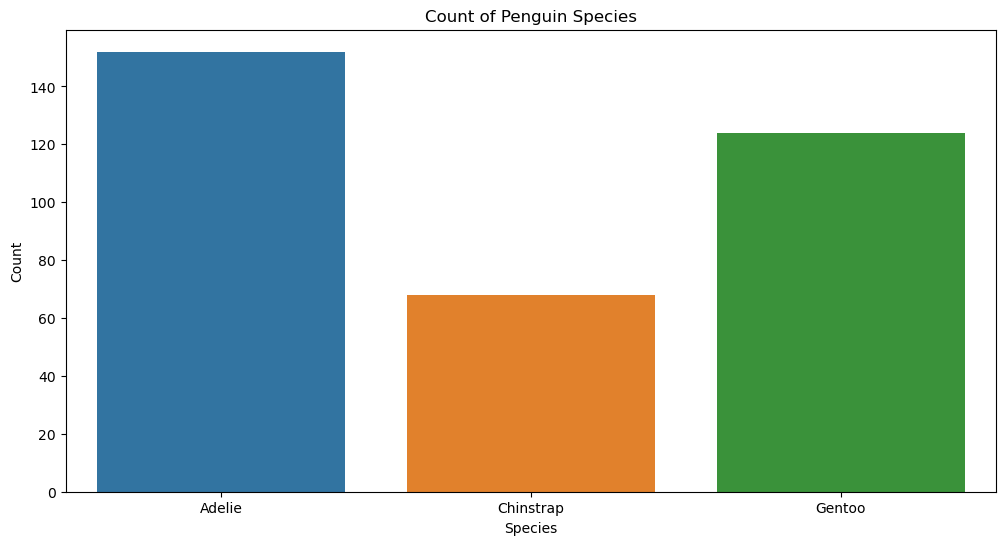

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='species', data=data)
plt.title('Count of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

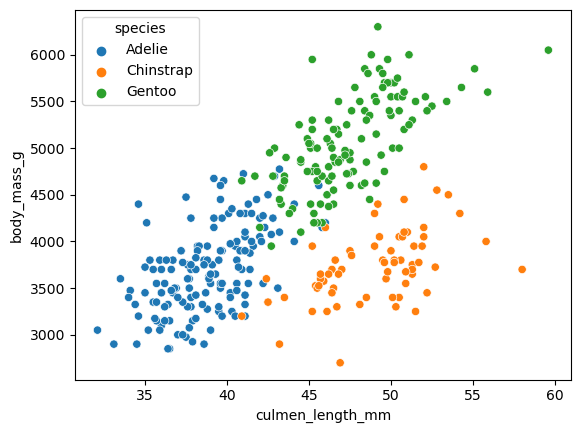

In [8]:
# Culmen length vs body mass
sns.scatterplot(x="culmen_length_mm", y="body_mass_g", hue="species", data=data)


In [9]:
abc=data['species'].value_counts()
abc

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20951455f10>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.19%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.05%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.77%')])

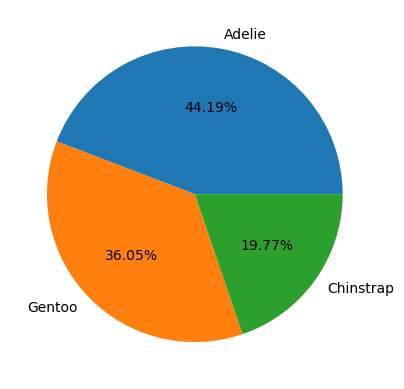

In [10]:
plt.pie(abc.values,autopct='%.2f%%',labels=abc.index)  

## Multivariate Analysis

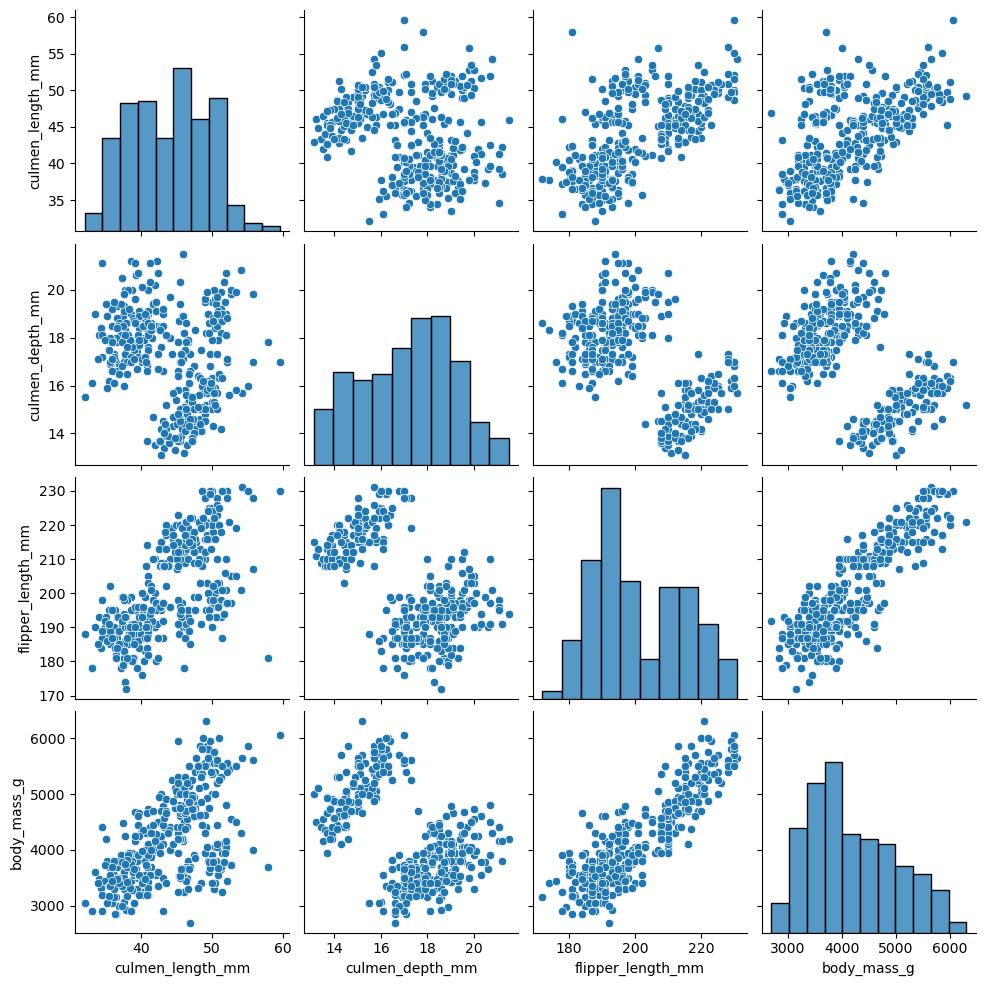

In [11]:
sns.pairplot(data)

## Discriptive statictics

In [12]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Check for Missing values and deal with them.

In [13]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
data["culmen_length_mm"].fillna(data['culmen_length_mm'].mean(),inplace=True)
data["culmen_depth_mm"].fillna(data['culmen_depth_mm'].mean(),inplace=True)
data["flipper_length_mm"].fillna(data['flipper_length_mm'].mean(),inplace=True)
data["body_mass_g"].fillna(data['body_mass_g'].mean(),inplace=True)
sex_mode = data['sex'].mode()[0]
data['sex'].fillna(sex_mode, inplace=True)

In [16]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Find the outliers and replace them outliers

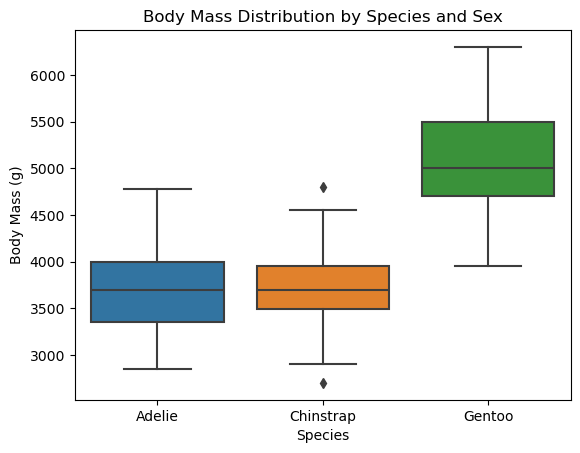

In [17]:
sns.boxplot(x = 'species',y = 'body_mass_g',data = data,)
plt.title('Body Mass Distribution by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

## Spliting Dependent and Independent Data

In [18]:
data.drop(columns=['body_mass_g'],inplace=True)

In [19]:
x=data.drop('species',axis=1)
y=data['species']

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   344 non-null    float64
 2   culmen_depth_mm    344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   sex                344 non-null    object 
dtypes: float64(3), object(2)
memory usage: 13.6+ KB


In [21]:
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,Torgersen,39.10000,18.70000,181.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,MALE
4,Torgersen,36.70000,19.30000,193.000000,FEMALE
...,...,...,...,...,...
339,Biscoe,43.92193,17.15117,200.915205,MALE
340,Biscoe,46.80000,14.30000,215.000000,FEMALE
341,Biscoe,50.40000,15.70000,222.000000,MALE
342,Biscoe,45.20000,14.80000,212.000000,FEMALE


In [22]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [23]:
x.shape

(344, 5)

## Categorical columns encoding

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
ct=ColumnTransformer([('oh',OneHotEncoder(),[0,4])],remainder='passthrough')

In [26]:
x=ct.fit_transform(x)

In [27]:
x.shape

(344, 9)

In [28]:
x

array([[  0. ,   0. ,   1. , ...,  39.1,  18.7, 181. ],
       [  0. ,   0. ,   1. , ...,  39.5,  17.4, 186. ],
       [  0. ,   0. ,   1. , ...,  40.3,  18. , 195. ],
       ...,
       [  1. ,   0. ,   0. , ...,  50.4,  15.7, 222. ],
       [  1. ,   0. ,   0. , ...,  45.2,  14.8, 212. ],
       [  1. ,   0. ,   0. , ...,  49.9,  16.1, 213. ]])

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
y=le.fit_transform(y)

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

In [35]:
x=sc.fit_transform(x)

In [36]:
x

array([[-0.97700842, -0.75075719,  2.36968028, ..., -0.88708123,
         0.78774251, -1.42248782],
       [-0.97700842, -0.75075719,  2.36968028, ..., -0.81349399,
         0.12655633, -1.06535169],
       [-0.97700842, -0.75075719,  2.36968028, ..., -0.66631952,
         0.43171918, -0.42250666],
       ...,
       [ 1.02353263, -0.75075719, -0.42199786, ...,  1.1917582 ,
        -0.73807176,  1.50602843],
       [ 1.02353263, -0.75075719, -0.42199786, ...,  0.23512413,
        -1.19581604,  0.79175618],
       [ 1.02353263, -0.75075719, -0.42199786, ...,  1.09977416,
        -0.53462985,  0.8631834 ]])

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

## Creating Model by Random Forest method

In [38]:
#Create Model
from sklearn.ensemble import RandomForestClassifier


In [39]:
#initialise the model
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [40]:
#train the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
#test the model
pred=rf.predict(x_test)

In [42]:
pred

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [43]:
y_test

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [44]:
#Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [46]:
print(accuracy)
print(conmat)

0.9855072463768116
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



## Creating Model by Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [50]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
pred2=df.predict(x_test)

In [52]:
pred2

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [53]:
accuracy2=accuracy_score(y_test,pred2)
conmat2=confusion_matrix(y_test,pred2)

In [54]:
print(accuracy2)
print(conmat2)

0.9855072463768116
[[34  0  0]
 [ 1  9  0]
 [ 0  0 25]]


In [55]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



## Creating Model by LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr=LogisticRegression()

In [58]:
#fitting the model
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
pred3=lr.predict(x_test)

In [60]:
pred3

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [61]:
confusion_matrix(y_test,pred3)

array([[33,  1,  0],
       [ 0, 10,  0],
       [ 0,  0, 25]], dtype=int64)

In [62]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



## Creating Model by GaussianNB 

In [63]:
# Initializing Naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [64]:
# fitting the model
nb.fit(x_train,y_train)  

GaussianNB()

In [65]:
# Testing 
pred4 = nb.predict(x_test) 

In [66]:
pred4

array([1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 2,
       2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [67]:
# Evaluating model performance
from sklearn import metrics
metrics.confusion_matrix(pred4,y_test)

array([[12,  0,  0],
       [ 9, 10,  0],
       [13,  0, 25]], dtype=int64)

In [68]:
# Evaluating model performance
print(metrics.classification_report(pred4,y_test)) 

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        12
           1       1.00      0.53      0.69        19
           2       1.00      0.66      0.79        38

    accuracy                           0.68        69
   macro avg       0.78      0.73      0.67        69
weighted avg       0.89      0.68      0.72        69



## Now Just See The Individual Accuracy Score of All Model For aur Penguine Dataset

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(pred,y_test)#RandomForest Classifier

0.9855072463768116

In [71]:
accuracy_score(pred2,y_test)#Decision Tree Classifier

0.9855072463768116

In [72]:
accuracy_score(pred3,y_test)#Logistic Regression

0.9855072463768116

In [74]:
accuracy_score(pred4,y_test)#Gaussian NB 

0.6811594202898551